In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
# loading the dataset
df = pd.read_csv('SampleData-Mobitel.csv')

In [3]:
df.head()

,id,package,product_desc,deducted_amt,event_time_stamp,connection_age,gender,age,dateval
0,52671547813691168,WAKEUP,Wake_up_call,1.23,2020-05-12 10:14:57,3768,0,37,2020-05-12
1,55993477747811320,CRBT_CNT,crbt_cnt_ren_Daily,3.68,2020-05-12 04:52:43,2755,0,36,2020-05-12
2,55993477747811320,CRBT_SRV,crbt_srv_ren_Daily,2.45,2020-05-12 03:42:44,2755,0,36,2020-05-12
3,52671565671173152,CRBT_SRV,crbt_srv_ren_Daily,2.45,2020-05-12 03:44:09,3764,1,57,2020-05-12
4,55993499054455256,B2W,Bid2Win,6.13,2020-05-12 10:36:05,2710,1,53,2020-05-12


In [4]:
# filetring out the relevant columns
df2 = df[['id', 'age', 'gender', 'connection_age']]
df2

,id,age,gender,connection_age
0,52671547813691168,37,0,3768
1,55993477747811320,36,0,2755
2,55993477747811320,36,0,2755
3,52671565671173152,57,1,3764
4,55993499054455256,53,1,2710
...,...,...,...,...
9995,55998334480175024,58,1,1462
9996,52676412906692448,47,1,3702
9997,52676412906692448,47,1,3702
9998,52676412906692448,47,1,3702


In [5]:
# removing duplicates
df3 = df2.drop_duplicates()
df3

,id,age,gender,connection_age
0,52671547813691168,37,0,3768
1,55993477747811320,36,0,2755
3,52671565671173152,57,1,3764
4,55993499054455256,53,1,2710
7,55993504611340432,44,0,2751
...,...,...,...,...
9990,55998329827709328,54,1,2272
9991,55998330038244280,38,0,1783
9993,55998331894431832,33,0,1432
9994,55998334480175024,58,1,1462


In [6]:
df3.describe()

,id,age,gender,connection_age
count,5.204000e+03,5204.000000,5204.000000,5204.000000
mean,5.523371e+16,40.471176,0.654497,1825.467717
std,1.417071e+15,84.468194,0.475578,1355.104945
min,4.934094e+16,-5969.000000,0.000000,0.000000
25%,5.596193e+16,31.000000,0.000000,663.750000
50%,5.598347e+16,40.000000,1.000000,1520.000000
75%,5.599232e+16,51.000000,1.000000,2780.000000
max,5.599881e+16,120.000000,1.000000,5743.000000


In [7]:
# we can see that the minimum value for age is minus, so those rows will be filetered out and removed

In [8]:
#df.drop_duplicates()

In [9]:
df3.head()

,id,age,gender,connection_age
0,52671547813691168,37,0,3768
1,55993477747811320,36,0,2755
3,52671565671173152,57,1,3764
4,55993499054455256,53,1,2710
7,55993504611340432,44,0,2751


In [10]:
df3[df3['age']< 0]

,id,age,gender,connection_age
2240,55964793478969584,-5969,1,334


In [11]:
df3.drop(df3[df3['age'] < 0].index, inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
df3[df3['age']< 0]

,id,age,gender,connection_age


In [13]:
df3.describe()

,id,age,gender,connection_age
count,5.203000e+03,5203.000000,5203.000000,5203.000000
mean,5.523357e+16,41.626177,0.654430,1825.754372
std,1.417171e+15,13.879209,0.475599,1355.077382
min,4.934094e+16,16.000000,0.000000,0.000000
25%,5.596193e+16,31.000000,0.000000,664.000000
50%,5.598347e+16,40.000000,1.000000,1520.000000
75%,5.599233e+16,51.000000,1.000000,2780.000000
max,5.599881e+16,120.000000,1.000000,5743.000000


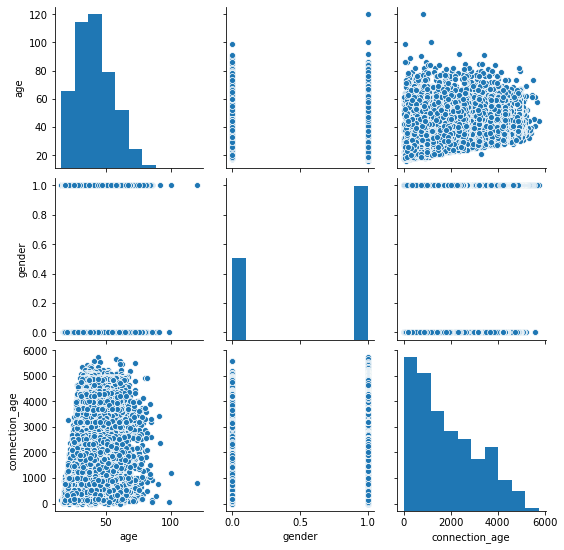

In [14]:
sns.pairplot(df3[['age', 'gender', 'connection_age']])

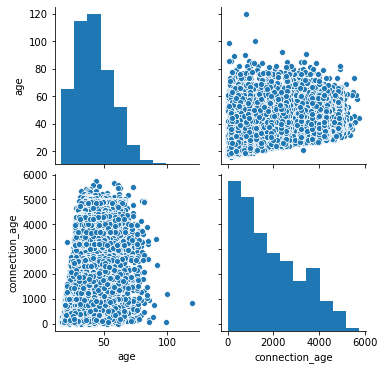

In [15]:
sns.pairplot(df3[['age', 'connection_age']])

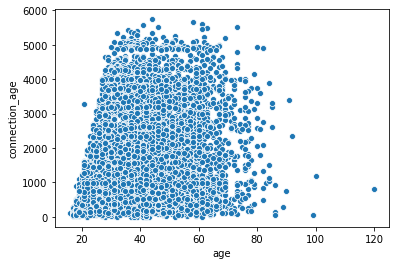

In [16]:
sns.scatterplot(x='age', y='connection_age', data=df3)

In [17]:
# finding the optimal number of clusters for age and connection

In [18]:
dfAgeConnect = df3[['age', 'connection_age']]

In [19]:
dfAgeConnect

,age,connection_age
0,37,3768
1,36,2755
3,57,3764
4,53,2710
7,44,2751
...,...,...
9990,54,2272
9991,38,1783
9993,33,1432
9994,58,1462


In [20]:
# finding the optimal number of clusters using elbow method
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dfAgeConnect)
    distortions.append(kmeanModel.inertia_)

In [21]:
clusterCenters = pd.DataFrame({'Clusters':K, 'Distortions': distortions})
clusterCenters 

,Clusters,Distortions
0,1,9.553095e+09
1,2,2.404177e+09
2,3,1.084497e+09
3,4,6.503159e+08
4,5,4.455851e+08
5,6,2.853231e+08
6,7,2.110705e+08
7,8,1.619590e+08
8,9,1.299993e+08


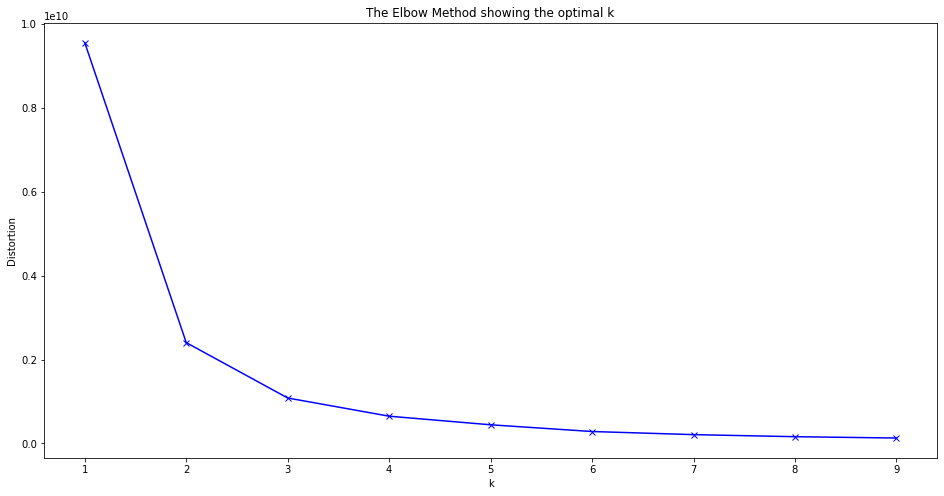

In [22]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [23]:
# finding the optimal number of clusters using silhoutte method
import sklearn.metrics as metrics

In [24]:
for i in range(2, 12):
    labels = KMeans(n_clusters = i, init = 'k-means++', random_state=200).fit(dfAgeConnect).labels_
    print('silhoutte score for clusters='+str(i)+' is '
         + str(metrics.silhouette_score(dfAgeConnect, labels, metric = 'euclidean', sample_size=1000, random_state=200)))

silhoutte score for clusters=2 is 0.6536305936490363
silhoutte score for clusters=3 is 0.6079504005114259
silhoutte score for clusters=4 is 0.5790673064200965
silhoutte score for clusters=5 is 0.5456082160854665
silhoutte score for clusters=6 is 0.5468614292947376
silhoutte score for clusters=7 is 0.5576919032898957
silhoutte score for clusters=8 is 0.5537648674099623
silhoutte score for clusters=9 is 0.5465235828918584
silhoutte score for clusters=10 is 0.5436821231943805
silhoutte score for clusters=11 is 0.5525900127692137


In [25]:
model = KMeans(n_clusters=2, init='k-means++')
kmeans = model.fit(dfAgeConnect[['age', 'connection_age']])

In [26]:
kmeans.cluster_centers_

array([[  39.86978852,  939.30664653],
       [  44.69730586, 3375.75013207]])

In [27]:
# attaching clusters to the original dataset

In [28]:
dfAgeConnect['Clusters'] = kmeans.labels_

<ipython-input-28-ef55012fcbe1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfAgeConnect['Clusters'] = kmeans.labels_


In [29]:
dfAgeConnect.head(10)

,age,connection_age,Clusters
0,37,3768,1
1,36,2755,1
3,57,3764,1
4,53,2710,1
7,44,2751,1
8,31,147,0
9,25,1061,0
10,48,724,0
12,42,3622,1
13,40,2737,1


In [30]:
dfAgeConnect['Clusters'].value_counts()

0    3313
1    1890
Name: Clusters, dtype: int64

In [31]:
df3['Clusters'] = kmeans.labels_

<ipython-input-31-bc0edbdb50a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Clusters'] = kmeans.labels_


In [32]:
df3.head(15)

,id,age,gender,connection_age,Clusters
0,52671547813691168,37,0,3768,1
1,55993477747811320,36,0,2755,1
3,52671565671173152,57,1,3764,1
4,55993499054455256,53,1,2710,1
7,55993504611340432,44,0,2751,1
8,55993506789914656,31,0,147,0
9,55993508505226464,25,0,1061,0
10,55993511811656080,48,0,724,0
12,52671586517193912,42,1,3622,1
13,55993525404741408,40,0,2737,1


In [33]:
df2['Clusters'] = df2['id'].map(df3.set_index('id')['Clusters'])

<ipython-input-33-ca7488de1e41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Clusters'] = df2['id'].map(df3.set_index('id')['Clusters'])


In [34]:
df2.head(20)

,id,age,gender,connection_age,Clusters
0,52671547813691168,37,0,3768,1.0
1,55993477747811320,36,0,2755,1.0
2,55993477747811320,36,0,2755,1.0
3,52671565671173152,57,1,3764,1.0
4,55993499054455256,53,1,2710,1.0
5,55993499054455256,53,1,2710,1.0
6,55993499054455256,53,1,2710,1.0
7,55993504611340432,44,0,2751,1.0
8,55993506789914656,31,0,147,0.0
9,55993508505226464,25,0,1061,0.0


In [35]:
#df.to_csv('.csv', ndex = False)

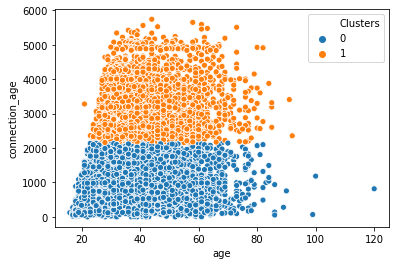

In [36]:
sns.scatterplot(x='age', y='connection_age', hue='Clusters', data=dfAgeConnect)

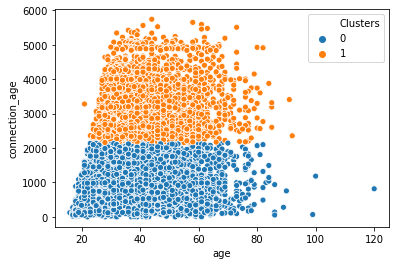

In [37]:
sns.scatterplot(x='age', y='connection_age', hue='Clusters', data=df3)